# Home assignment 4. Diffusion generative models

Author: Alexander kolesov

<img src="https://go2phystech.ru/wp-content/uploads/2021/02/skolteh.jpeg" width=800 height=200 />

### Important information

$\textbf{Deadline}$: 23:59:59, 8 December 2025 (Monday)\
$\textbf{Rules}$:
- Do not redistribure materials of this homework, they belong to Skoltech.
- This is your individual work. Please, do not consult with the other students and do not copy their work. Otherwise, you will get 0 points.
- Please, respect the homework deadlines!
- This HW is composed of 2 tasks with the corresponding points: task 1 - 7 pts, task 2 - 3 pts and Bonus task. Overall, 10 points + Bonus.
- After the grades are posted, you will have one week to appeal (offline, on campus).


# Task 1. Denoising Diffusion Implicit Models (DDIM) (3 pts)

## 1.1 Recall DDPM model


1. The DDPM is defined via forward process that is **Markovian** :



   $$
        q(\mathbf{x}_t | \mathbf{x}_{t-1}) = q(\mathbf{x}_t | \mathbf{x}_{t-1}, \mathbf{x}_0)
   $$

2. The probability of transformation is defined in accordance with the Theorem form the corresponding seminar:

 $$
        q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathcal{N}\left( \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t \mathbf{I} \right),
   $$
   where $\{ \beta_t \in (0, 1) \}_{t=1}^{T}$ и $\beta_1 \leq \beta_2 \leq \ldots \leq \beta_T$ — schedule of variances.
   
   
3.  We introduce $\alpha_t = 1 - \beta_t$ and rewrite the last statement:
  
  $$q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathcal{N}\left( \sqrt{\alpha_t} \mathbf{x}_{t-1}, (1 - \alpha_t) \mathbf{I} \right)
   $$

4.  The main formula for the noising images for arbitrary time step $t$ is derived from the transformation probability (see the corresponding lecture):
   $$
        q(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t) \mathbf{I} \right),
   $$
   where $\bar{\alpha}_t = \prod_{i=1}^{t} \alpha_i$.

5. The reverse process, in accordance with Feller theorem (from the seminar), is Markovian too. Since the forward probabilities of transformation were **Gaussian**, then the corresponding reversed will be Gaussian with **unknown** parameters

$$ p_{\theta}(x_{t-1}|x_{t}) = \mathcal{N}(x_{t-1}|\mu_{\theta}(x_{t}), \tilde{\sigma}^{2}I) $$

6. ELBO loss function might be represented as minimization of KL-divergence at each moment of time. To provide such minimization, we represent $q(x_{t-1}|x_{t})$ through Bayesian formula.

$$
        q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left( \tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0), \tilde{\sigma}_t^2 \mathbf{I} \right),
   $$

  where
   $$
        \tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0) = \frac{\bar{\alpha}_t (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \mathbf{x}_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \mathbf{x}_0,
   $$
   $$
        \tilde{\sigma}_t^2 = \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t,
   $$

Also, one can rewrite mean not through initila image $\mathbf{x}_0$, but through noise $\boldsymbol{\epsilon}_t$:
   $$
        \tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \boldsymbol{\epsilon}_t) = \frac{1}{\sqrt{\alpha_t}} \left( \mathbf{x}_t - \frac{1 - \alpha_t}{\sqrt{1 - \bar{\alpha}_t}} \boldsymbol{\epsilon}_t \right),
   $$
   where
   $$
        \boldsymbol{\epsilon}_t = \frac{1}{\sqrt{1 - \bar{\alpha}_t}} \left( \mathbf{x}_t - \sqrt{\bar{\alpha}_t} \mathbf{x}_0 \right)
   $$

6. Finally, we can learn one of three different models for variational distribution $p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t)$:

1) Mean prediction $\boldsymbol{\mu}_\theta(\mathbf{x}_t, t)$:
$$
    p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}\left( \boldsymbol{\mu}_\theta(\mathbf{x}_t, t), \tilde{\sigma}_t^2 \mathbf{I} \right)          
$$

During the seminar, we said the shortcomings of such prediction

2) We can substitute representation of mean through $\mathbf{x}_0$ and learn $\hat{\mathbf{x}}_\theta(\mathbf{x}_t, t)$ be closer to  $\mathbf{x}_0$ :
$$
    p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}\left( \frac{\bar{\alpha}_t (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \mathbf{x}_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \hat{\mathbf{x}}_\theta(\mathbf{x}_t, t), \tilde{\sigma}_t^2 \mathbf{I} \right)          
$$

During the seminar, we said the shortcomings of such prediction too

3) Finally, we represent mean through $\boldsymbol{\epsilon}_t$ and predict $\hat{\boldsymbol{\epsilon}}_\theta(\mathbf{x}_t, t)$:
$$
    p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}\left( \frac{1}{\sqrt{\alpha_t}} \left( \mathbf{x}_t - \frac{1 - \alpha_t}{\sqrt{1 - \bar{\alpha}_t}} \hat{\boldsymbol{\epsilon}}_\theta(\mathbf{x}_t, t) \right), \tilde{\sigma}_t^2 \mathbf{I} \right)          
$$

## 1.2 DDIM

! Please, **read** the paper below

The authors of [Denoising Diffusion Implicit Models (DDIM)](https://arxiv.org/abs/2010.02502) considered **Non-Markovian** forward process!

The forward process of DDPM looks like below:

$$
    q(\mathbf{x}_{1:T} | \mathbf{x}_0) = \prod_{t=1}^{T} q(\mathbf{x}_{t} | \mathbf{x}_{t-1})
$$

<figure align="center">
    <img src="./screen2.png" alt="ddpm" width="500"/>
    <figcaption> Forward process DDPM. Источник: <a href="https://arxiv.org/abs/2006.11239">Ho et al. 2020</a> </figcaption>
</figure>

DDIM builds the process by another way:

$$
    q_\sigma(\mathbf{x}_{1:T} | \mathbf{x}_0) = q_\sigma(\mathbf{x}_T | \mathbf{x}_0) \prod_{t=2}^{T} q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)
$$

<figure align="center">
    <img src="./screen3.png" alt="ddim" width="500"/>
    <figcaption> forward process of DDIM. Источник: <a href="https://arxiv.org/abs/2006.11239">Ho et al. 2020</a> </figcaption>
</figure>


Thus:

- The last object in the chain $\mathbf{x}_T$ is directly obtained from $\mathbf{x}_0$
- Each intermediate noised object $\mathbf{x}_{t-1}$ is obtained from $\mathbf{x}_0$ and the following $\mathbf{x}_t$!

Immediate question, how can we derive $q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)$?

We consider Gaussian distribution. Importantly, we make mean as a linear function of $\mathbf{x}_0$ and $\mathbf{x}_t$.  We write this demanding:
$$
    q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left( w_0 \mathbf{x}_0 + w_t \mathbf{x}_t + b, \sigma_t^2 \mathbf{I} \right)
$$

**Question.** How do we have to define $w_0$, $w_t$ and $b$?

**Answer** The idea is that $q_\sigma(\mathbf{x}_t | \mathbf{x}_0)$ is the same like in DDPM:
$$
    q_\sigma(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t) \mathbf{I} \right)
$$

## 1.3 Derivation of DDIM

**The main core of derivation in DDIM**

Let me assume, that we have already proved that:
$$
    q_\sigma(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t) \mathbf{I} \right),
$$
How do we have to choose $w_0$, $w_t$ and $b$ to provide:
$$
    q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_0, (1 - \bar{\alpha}_{t-1}) \mathbf{I} \right)?
$$

**Idea 1**  We condition the distribution of $\mathbf{x}_t$  and integrate. it and express the joint probability through conditional:
$$
    q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_0) = \int q_\sigma(\mathbf{x}_{t-1}, \mathbf{x}_t | \mathbf{x}_0) d\mathbf{x}_t = \int q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) q_\sigma(\mathbf{x}_{t} | \mathbf{x}_0) d\mathbf{x}_t
$$


## $\color{olive}{\text{Task}}  1.1$(1 point)
 You should prove the following property of normal distribution here in latex code (**you will not use paper, only latex here!!**)

Namely, if  we have $p(\mathbf{x}) = \mathcal{N}(\boldsymbol{\mu}, \sigma_{\mathbf{x}}^2\mathbf{I})$ and $p(\mathbf{y} | \mathbf{x}) = \mathcal{N}(a\mathbf{x} + b, \sigma_{\mathbf{y}}^2\mathbf{I})$, then:

$$
    p(\mathbf{y}) = \int p(\mathbf{y}, \mathbf{x}) d\mathbf{x} = \int p(\mathbf{y} | \mathbf{x}) p(\mathbf{x}) d\mathbf{x} = \mathcal{N}\left(a \boldsymbol{\mu} + b, \left( \sigma_{\mathbf{y}}^2 + a^2 \sigma_{\mathbf{x}}^2 \right) \mathbf{I}\right)
$$

$\color{red}{\text{Important}}$ : Your derivation should be understandable and clear with explicit transformations as for children, each transformation and each formula should be explained perfectly!

$\mathbf{Solution}$:

From problem statement we can say that:
\begin{align*}
\mathbb{E}[y|x] = ax+b,\quad Var[y|x] = \sigma_{\mathbf{y}}^2\mathbf{I} \quad \text{[as y|x distributed w.r.t $\mathcal{N}(a\mathbf{x} + b, \sigma_{\mathbf{y}}^2\mathbf{I})$]}
\end{align*}

For expectation we can use tower property of expecation and state that: $\mathbb{E}[\mathbb{E}[y|x]] = \mathbb{E}[y]$, but previous row state that" $\mathbb{E}[\mathbb{E}[y|x]] = \mathbb{E}[ax+b]$.

So, combine this we get: 
\begin{align*}
\mathbb{E}[y] = \mathbb{E}[ax+b] = a \mathbb{E}[x] + \mathbb{E}[b] = a \mu + b
\end{align*}
Now let's find varince of y.

We know that $Var[y|x] = \mathbb{E}[y^2|x] - \mathbb{E}^2[y|x]=$[combine with very first exprasion] =$\sigma_{\mathbf{y}}^2\mathbf{I}$. Let's also apply tower propert here:
\begin{align*}
\mathbb{E}[Var[y|x]] = \mathbb{E}[\mathbb{E}[y^2|x]] - \mathbb{E}[\mathbb{E}^2[y|x]] = \mathbb{E}[y^2] - \mathbb{E}[(a x + b)^2] =\\
= \mathbb{E}[y^2] - \mathbb{E}[(a x)^2 + 2axb + b^2] = \mathbb{E}[y^2] - \mathbb{E}[(a x)^2] - 2a\cdot \mathbb{E}[x] \cdot b - b^2=\\
= \mathbb{E}[y^2] - a^2\mathbb{E}[x^2] - 2a\mu b - b^2 = \mathbb{E}[y^2] - a^2(Var(x) + \mathbb{E}^2[x]) - 2a\mu b - b^2 = \\
= \mathbb{E}[y^2] - a^2(\sigma_{\mathbf{x}}^2\mathbf{I} + \mu^2) - 2a\mu b - b^2 = \mathbb{E}[y^2] - (a^2 \mu^2 + 2a\mu b + b^2) - a^2\sigma_{\mathbf{x}}^2\mathbf{I}= \\
= \mathbb{E}[y^2] - \mathbb{E}[a^2 \mu^2 + 2a\mu b + b^2] - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \mathbb{E}[y^2] - \mathbb{E}[(ax + b)^2] - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \\
= \mathbb{E}[y^2] - \mathbb{E}[(a\mu + b)^2] - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \mathbb{E}[y^2] - \mathbb{E}[\mathbb{E}[y]^2] - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \mathbb{E}[y^2] - \mathbb{E}[y]^2 - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \\
= Var(y) - a^2\sigma_{\mathbf{x}}^2\mathbf{I}
\end{align*}

But from the other hand:
$$
\mathbb{E}[Var[y|x]] = \mathbb{E}[\sigma_{\mathbf{y}}^2\mathbf{I}] = \sigma_{\mathbf{y}}^2\mathbf{I}
$$

So, in the result we have:
\begin{align*}
Var(y) - a^2\sigma_{\mathbf{x}}^2\mathbf{I} = \sigma_{\mathbf{y}}^2\mathbf{I}\\
Var(y) = a^2\sigma_{\mathbf{x}}^2\mathbf{I} + \sigma_{\mathbf{y}}^2\mathbf{I}\\
Var(y) = (a^2\sigma_{\mathbf{x}}^2 + \sigma_{\mathbf{y}}^2)\mathbf{I}
\end{align*}

We proved, that $$Var(y)=(a^2\sigma_{\mathbf{x}}^2 + \sigma_{\mathbf{y}}^2)\mathbf{I}\quad$$ and $$\quad\mathbb{E}[y] = a \mu + b.$$

Now, under the integral $p(y)$ we have product of pdf of two normal distributions (exponent family) and consequently this product also from exponential family. Ans Consequenly, moreover:

<!-- $\textbf{End of the solution}$ -->
$$
    p(\mathbf{y}) = \int p(\mathbf{y}, \mathbf{x}) d\mathbf{x} = \int p(\mathbf{y} | \mathbf{x}) p(\mathbf{x}) d\mathbf{x} = \int \mathcal{N}(a\mathbf{x} + b, \sigma_{\mathbf{y}}^2\mathbf{I}) \mathcal{N}(\boldsymbol{\mu}, \sigma_{\mathbf{x}}^2\mathbf{I}) d\mathbf{x}
$$
Now, let's recall how we can rewrite function under the integral:

$$
p_{x} = \frac{1}{(2 \pi)^{n/2} |\sigma_x^2I|^{1/2}} \cdot \exp(-\frac{1}{2}(x-\mu)^{T}\frac{1}{\sigma_x^2}I (x-\mu)) 
$$

$$
p_{y|x} = \frac{1}{(2 \pi)^{n/2} |\sigma_y^2I|^{1/2}} \cdot \exp(-\frac{1}{2}(y - ax - b)^{T}\frac{1}{\sigma_y^2}I (y - ax - b))
$$
Then, 
$$
p(\mathbf{y}) = \int \frac{1}{(2 \pi)^{n/2} |\sigma_y^2I|^{1/2}} \cdot \exp(-\frac{1}{2}(y - ax - b)^{T}\frac{1}{\sigma_y^2}I (y - ax - b)) \cdot \frac{1}{(2 \pi)^{n/2} |\sigma_x^2I|^{1/2}} \cdot \exp(-\frac{1}{2}(x-\mu)^{T}\frac{1}{\sigma_x^2}I (x-\mu)) dx
$$

Separetly let's derive what we get into the exponent:

\begin{align*}
-\frac{1}{2}(y - ax - b)^{T}\frac{1}{\sigma_y^2}I (y - ax - b) - \frac{1}{2}(x-\mu)^{T}\frac{1}{\sigma_x^2}I (x-\mu) = \\
 = -\frac{1}{2}(ax + b - y)^{T}\frac{1}{\sigma_y^2}I (ax + b - y) - \frac{1}{2}(x-\mu)^{T}\frac{1}{\sigma_x^2}I (x-\mu) = \\
 = -\frac{1}{2}\cdot a(x + \frac{b - y}{a})^{T}\frac{1}{\sigma_y^2}I \cdot a(x + \frac{b - y}{a}) - \frac{1}{2}(x-\mu)^{T}\frac{1}{\sigma_x^2}I (x-\mu) =\\
 = -\frac{a^2}{2\sigma_y^2}(x + \frac{b - y}{a})^{T}I (x + \frac{b - y}{a}) - \frac{1}{2\sigma_x^2}(x-\mu)^{T}I (x-\mu) =\\ = \Big( -\frac{a^2}{2\sigma_y^2}(x + \frac{b - y}{a})-  \frac{1}{2\sigma_x^2}(x-\mu) \Big)^{T} I \Big( (x + \frac{b - y}{a}) -  (x-\mu) \Big)\\
\end{align*}

It's normal distribution and consequenlty, we already show taht $$Var(y)=(a^2\sigma_{\mathbf{x}}^2 + \sigma_{\mathbf{y}}^2)\mathbf{I}\quad$$ and $$\quad\mathbb{E}[y] = a \mu + b.$$


In the result, $y = \mathcal{N}( a \mu + b, (a^2\sigma_{\mathbf{x}}^2 + \sigma_{\mathbf{y}}^2)\mathbf{I})$ 
<!-- 
Let's stop here and consider some notes. Since we are workong in the n-dimensional space then $ M = -\frac{a^2}{2\sigma_y^2}(x + \frac{b - y}{a})^{T}I (x + \frac{b - y}{a}) - \frac{1}{2\sigma_x^2}(x-\mu)^{T}I (x-\mu)$ is a n-dimensioanl diagonal matrix, where each diagonal elemnt equals to following expression:

\begin{align*}
M_{ii} = -\frac{a^2}{2\sigma_y^2}(x_i + \frac{b - y_i}{a})^2 - \frac{1}{2\sigma_x^2} (x_i-\mu_i)^2 = -\frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_i(b - y_i) + (b - y_i)^2) - \frac{1}{2\sigma_x^2} (x_i^2-2x_i\mu_i +\mu_i^2) =\\
= -\frac{1}{2\sigma_y^2} y_i^2 -\frac{1}{2\sigma_y^2}(-2ax_i - 2b) \cdot  y_i + (- \frac{1}{2\sigma_x^2} (x_i^2-2x_i\mu_i +\mu_i^2) - \frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_ib + b^2))
\end{align*}
Now, note that the last term: $- \frac{1}{2\sigma_x^2} (x_i^2-2x_i\mu_i +\mu_i^2)$ doesn't depend on y and consequently when taking integral w.r.t. x it will be just constant, so futher lets work only with first term, and define: $- \frac{1}{2\sigma_x^2} (x_i^2-2x_i\mu_i +\mu_i^2) = f(x_{i})$ - to show that it's some quadratic function on x.

Now, 
\begin{align*}
M_{ii} = -\frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_i(b - y_i) + (b - y_i)^2) + f(x_{i}) =\\= -\frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_ib - 2ax_iy_i + b^2 - 2by_i + y_i^2) + f(x_{i}) =\\= -\frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_ib - 2ax_iy_i + b^2 - 2by_i + y_i^2) + f(x_{i})
\end{align*}
Now as we did before, let's devide this equation on part with y and part with x (so we can treat it like a constant:
\begin{align*}
M_{ii} =  -\frac{1}{2\sigma_y^2}((ax_i)^2 + 2ax_ib) + f(x_{i}) -\frac{1}{2\sigma_y^2}(- 2ax_iy_i + b^2 - 2by_i + y_i^2)
\end{align*}
 -->

We apply Idea 1 to the result of Task 1.1.

 $$
    q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_0) = \mathcal{N}\left( w_0 \mathbf{x}_0 + w_t (\sqrt{\bar{\alpha}}_t \mathbf{x}_0) + b, \left( \sigma_t^2 + w_t^2 (1 - \bar{\alpha}_t) \right) \mathbf{I}\right)
$$



**Question**   How do I proceed to select the coefficients $w_0$, $w_t$ and $b$?

**Answer**  Just equate! At the same time, we start with the variance.

1. First, we equate the variance, i.e.
$$
\sigma_t^2 + w_t^2 (1 - \bar{\alpha}_t) = 1 - \bar{\alpha}_{t-1},
$$
from where we express $w_t$ through everything else:
$$
w_t = \sqrt{\frac{1 - \bar{\alpha}_{t-1} - \sigma_t^2}{1 - \bar{\alpha}_t}}
$$

2. And now we equate the averages and substitute the already found $w_t$:
$$
w_0 \mathbf{x}_0 + w_t (\sqrt{\bar{\alpha}}_t \mathbf{x}_0) + b = \sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_0,
$$
and for for simplicity, we can equate $b = 0$, from which it immediately follows
$$
w_0 =\sqrt{\bar{\alpha}_{t-1}} - \sqrt{\bar{\alpha}_t} \sqrt{\frac{1 - \bar{\alpha}_{t-1} - \sigma_t^2}{1 - \bar{\alpha}_t}}
$$

Thus, we have obtained the formula of the reverse process in DDIM:
$$
 q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_0 - \sqrt{\bar{\alpha}_t} \sqrt{\frac{1 - \bar{\alpha}_{t-1} - \sigma_t^2}{1 - \bar{\alpha}_t}} \mathbf{x}_0 + \sqrt{\frac{1 - \bar{\alpha}_{t-1} - \sigma_t^2}{1 - \bar{\alpha}_t}} \mathbf{x}_t, \sigma_t^2 \mathbf{I} \right),
$$

or, finally, the final expression:
$$
q_\sigma(\mathbf{x}_{t-1} |\mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left(\sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_{t-1} - \sigma_t^2} \cdot\frac{\mathbf{x}_t - \sqrt{\bar{\alpha}_t} \mathbf{x}_0}{\sqrt{1 - \bar{\alpha}_t}}, \sigma_t^2 \mathbf{I} \right),
$$
moreover, we emphasize that **for any** $\sigma_t^2$ $q_\sigma(\mathbf{x}_t | \mathbf{x}_0)$ remains the same as in DDPM!

One can consider DDPM and DDIM again:

**DDPM**

- $q(\mathbf{x}_t | \mathbf{x}_{t-1})$ is defined
- $\color{purple}{q(\mathbf{x}_t | \mathbf{x}_0)}$ и $\color{olive}{q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)}$ are derived from $q(\mathbf{x}_t | \mathbf{x}_{t-1})$

**DDIM**

- $\color{olive}{q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)}$ is defined
- $\color{purple}{q(\mathbf{x}_t | \mathbf{x}_0)}$ и $q(\mathbf{x}_t | \mathbf{x}_{t-1})$ are derived from $\color{olive}{q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)}$

## $\color{olive}{\text{Task}}  1.2$(1 point)
 You should derive $q(x_{t}|x_{t-1},x_{0})$ from $q(x_{t-1}|x_{t},x_{0})$   (**you will not use paper, only latex here!!**)

 - $q(x_{t}|x_{t-1},x_{0})$ is derived through Bayesian formula

 - Also, you should demonstrate how $q(x_{t}|x_{0})$ is derived from $q(x_{t-1}|x_{t},x_{0})$


 $\color{red}{\text{Important}}$ : Your derivation should be understandable and clear with explicit transformations as for children, each transformation and each formula should be explained perfectly!


$\textbf{Solution}$
Using Bayesian formula we get:
\begin{align*}
q(x_{t}|x_{t-1},x_{0}) = \frac{q(x_{t}, x_{t-1},x_{0})}{q(x_{t-1},x_{0})} = \frac{q(x_{t-1}|x_{t},x_{0}) \cdot q(x_{t},x_{0})}{q(x_{t-1},x_{0})} = \frac{q(x_{t-1}|x_{t},x_{0}) \cdot q(x_{t}| x_{0}) \cdot q(x_{0})}{q(x_{t-1}|x_{0}) \cdot q(x_{0})} = \frac{q(x_{t-1}|x_{t},x_{0}) \cdot q(x_{t}| x_{0})}{q(x_{t-1}|x_{0})}
\end{align*}

From definition we have:

$$
q(x_t| x_0) = \int q(x_{t-1}, x_t| x_0)  d(x_{t-1})
$$

And now with previuos derivation let's rewrite this integral:

\begin{align*}
q(x_t| x_0) = \int q(x_{t-1}, x_t| x_0)  d(x_{t-1}) =  \int \frac{q(x_{t-1}|x_t,x_{0}) \cdot q(x_t,x_0)}{q(x_0)} d(x_{t-1}) = \int q(x_{t-1}|x_t,x_{0}) \cdot q(x_t|x_0)d(x_{t-1}) = \\
= \text{[since $ q(x_t|x_0)$ doesn't depend on $x_{t-1}$ it can be taken otside of the integral]} = q(x_t|x_0) \int q(x_{t-1}|x_t,x_{0}) d(x_{t-1}) = \\
= q(x_t|x_0) \int q(x_{t-1}|x_t,x_{0}) d(x_{t-1}) = \text{[since $q(x_{t-1}|x_t,x_{0})$ is pdf]} = q(x_t|x_0) \cdot 1 = q(x_t|x_0)
\end{align*}

## 1.4 Training of DDIM

The beauty of DDIM is that in fact its ** training is no different** from DDPM training!

This is exactly the theorem that the authors of the article prove.

So the super important conclusion for us is that we **don't need to retrain the noise predictor**.

Therefore, the noise predictor $\hat{\boldsymbol{\epsilon}}_\theta(\mathbf{x}_t,t)$ trained for DDPM can be directly used in the reverse DDIM process!

Let me recall backward process at DDPM

**DDPM**

$$
    q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left( \frac{\bar{\alpha}_t (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \mathbf{x}_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \mathbf{x}_0, \left( \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t \right) \mathbf{I} \right)          
$$

For each step $t = T, \ldots, 1$, repeat:

1. calculate estimation of initial sample by $\mathbf{x}_{0|t} = \frac{1}{\sqrt{\bar{\alpha}_t}} \left( \mathbf{x}_t - \sqrt{1 - \bar{\alpha}_t} \hat{\boldsymbol{\epsilon}}_\theta(\mathbf{x}_t, t) \right)$
2. calculate mean  $\color{purple}{\tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0) = \frac{\bar{\alpha}_t (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \mathbf{x}_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \mathbf{x}_{0|t}}$
3. Sampling $\mathbf{z}_t \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$
4. Calculate Reparam trick $\mathbf{x}_{t-1} = \tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0) + \color{olive}{\sqrt{\frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t}} \mathbf{z}_t$

**DDIM**

$$
    q_\sigma(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0) = \mathcal{N}\left( \sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_{t-1} - \sigma_t^2} \cdot \frac{\mathbf{x}_t - \sqrt{\bar{\alpha}_t} \mathbf{x}_0}{\sqrt{1 - \bar{\alpha}_t}}, \sigma_t^2 \mathbf{I} \right)
$$

For each step $t = T, \ldots, 1$, repeat:

1. calculate estimation of intial point by $\mathbf{x}_{0|t} = \frac{1}{\sqrt{\bar{\alpha}_t}} \left( \mathbf{x}_t - \sqrt{1 - \bar{\alpha}_t} \hat{\boldsymbol{\epsilon}}_\theta(\mathbf{x}_t, t) \right)$
2. calculate mean $\color{purple}{\tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0) = \sqrt{\bar{\alpha}_{t-1}} \mathbf{x}_{0|t} + \sqrt{1 - \bar{\alpha}_{t-1} - \sigma_t^2} \cdot \frac{\mathbf{x}_t - \sqrt{\bar{\alpha}_t} \mathbf{x}_{0|t}}{\sqrt{1 - \bar{\alpha}_t}}}$
3. Sampling $\mathbf{z}_t \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$
4. Calculate Reparam trick  $\mathbf{x}_{t-1} = \tilde{\boldsymbol{\mu}}(\mathbf{x}_t, \mathbf{x}_0) + \color{olive}{\sigma_t} \mathbf{z}_t$

**DDIM is generalization DDPM**!

The are the same
$$
    \sigma_t^2 = \tilde{\sigma}_t^2 = \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t
$$

Then DDIM is Markovian Process!

## 1.5 Accelerated sampling with DDIM

The reverse process by which sampling is performed in both DDPM and DDIM, with a sequence of steps $t\in [1, 2, \ldots, T]$ has the following form:
$$
 p_\theta(\mathbf{x}_{0:T}) = p_\theta(\mathbf{x}_T) \prod_{t=1}^T p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t)
$$

And how can such a process be accelerated? Let's look at the **subsequence** of time steps $\tau = [\tau_1, \tau_2, \ldots, \tau_S]$.

Then the reverse process for the subsequaence is defined as
$$
 p_\theta(\mathbf{x}_\tau) = p_\theta(\mathbf{x}_T) \prod_{i=1}^{\color{olive}{S}} p_\theta(\mathbf{x}_{\color{olive}{\tau_{i-1}}} | \mathbf{x}_{\color{olive}{\tau_{i}}})
$$

The question arises: what was the problem with using an accelerated sampling process for DDPM?

It turns out that ** a small number of** steps led to a significant ** deterioration in the quality of ** generation.

However, quality degradation **was avoided** when using DDIM, as soon as the reverse process became more **deterministic**.

Given the similarity of DDIM and DDPM, the following value is usually introduced, namely,
parameterize $$
\sigma_t = \color{olive}{\eta} \sqrt{\frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t},
$$
then when
- $\eta = 0$: we get a deterministic process, that is, for the same $\mathbf{x}_T\sim\mathcal{N}(\mathbf{0}, \mathbf{I})$ we will always get the same $\mathbf{x}_0$
- $\eta = 1$: the same as DDPM

Let's look at an example from the DDIM article that the authors give. They took a trained DDPM model and looked at how different sampling affects the quality of the generation.


The FID metric was measured (the smaller the better) when varying
- $\eta$ responsible for stochasticity
- $S$, responsible for the number of steps in the sampling process

<figure align="center">
    <img src="./screen1.png" alt="ddpm-vs-ddim" width="500"/>
    <figcaption> Generating images CIFAR10 and CelebA through FID. η=1 corresponds  to DDPM,  η=0 corresponds DDIM. Source: <a href="https://arxiv.org/abs/2010.02502">Song et al. 2020</a> </figcaption>
</figure>


The following conclusions can be drawn from the table:
- When $\eta= 1$ (DDPM), the quality deteriorates rapidly when $S$ decreases from 1000 to 10
- When $\eta = 0$ (deterministic DDIM),
- The quality is not so bad even at $S = 10$
 - The quality at $S = 1000$ turns out to be even better than that of DDPM!

## $\color{olive}{\text{Task}}  1.3$(2  points)

DDIM is applied for acceleration of sampling of already trained DDPM. Thus, the pipeline is following:

![swiss roll](https://scikit-learn.org/stable/_images/sphx_glr_plot_swissroll_001.png)

- Train DDPM on Swiss roll **2D** dataset (3 points)

To solve this task, you should figure out the previous seminar of DDPM and add necessary part of code

- Run DDIM on inference with **trained** DDPM (2 points)



In [1]:
import numpy as np
import math
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_swiss_roll
from sklearn.utils import shuffle
from copy import deepcopy
import pandas as pd
from tqdm.notebook import tqdm

### 1.3.1 Swill roll 2D dataset

In [2]:
from sklearn.datasets import make_circles, make_swiss_roll


def make_swiss_dataset(num_samples):
    X0, _ = make_swiss_roll(num_samples // 2, noise=0.3, random_state=0)
    X1, _ = make_swiss_roll(num_samples // 2, noise=0.3, random_state=0)
    X0 = X0[:, [0, 2]]
    X1 = X1[:, [0, 2]]
    X1 = -X1
    X, y = shuffle(
        np.concatenate([X0, X1], axis=0),
        np.concatenate([np.zeros(len(X0)), np.ones(len(X1))], axis=0),
        random_state=0)
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    return X, y

X, y = make_swiss_dataset(2000)

In [3]:
def get_data_iter(X: np.array, y: np.array, batch_size1: int = 512):
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).long()
    dataset = torch.utils.data.TensorDataset(X, y)

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size1, shuffle=True)
    while True:
        yield from data_loader

data_iter = get_data_iter(X, y)

In [4]:
data_iter

<generator object get_data_iter at 0x12d1e2340>

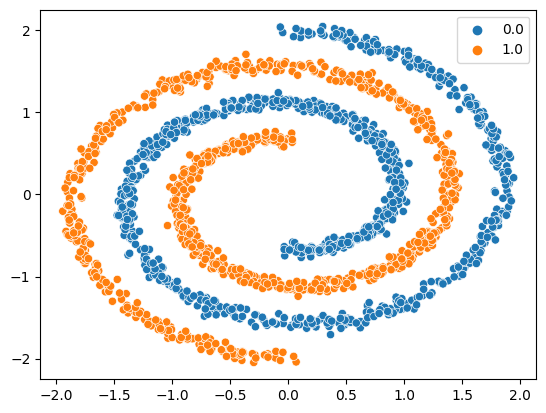

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

### 1.3.2 DDPM model

In [6]:
# utility function. basicalle, returns arr[timesteps], where timesteps are indices. (look at class Diffusion)
def _extract_into_tensor(arr, timesteps, broadcast_shape):
    """
    Extract values from a 1-D torch tensor for a batch of indices.
    :param arr: 1-D torch tensor.
    :param timesteps: a tensor of indices into torche array to extract.
    :param broadcast_shape: a larger shape of K dimensions witorch torche batch
                            dimension equal to torche lengtorch of timesteps.
    :return: a tensor of shape [batch_size, 1, ...] where torche shape has K dims.
    """
    res = arr.to(device=timesteps.device)[timesteps].float()
    while len(res.shape) < len(broadcast_shape):
        res = res[..., None]
    return res.expand(broadcast_shape)

# out beta_t. we use linear scheduler
def get_named_beta_schedule(schedule_name, num_diffusion_timesteps):
    """
    Get a pre-defined beta schedule for the given name.
    The beta schedule library consists of beta schedules which remain similar
    in the limit of num_diffusion_timesteps.
    Beta schedules may be added, but should not be removed or changed once
    they are committed to maintain backwards compatibility.
    """
    scale = 1000 / num_diffusion_timesteps
    beta_start = scale * 0.0001
    beta_end = scale * 0.02
    if schedule_name == "linear":
        # Linear schedule from Ho et al, extended to work for any number of
        # diffusion steps.
        return np.linspace(
            beta_start, beta_end, num_diffusion_timesteps, dtype=np.float64
        )
    elif schedule_name == "quad":
        betas = torch.linspace(beta_start ** 0.5, beta_end ** 0.5, num_diffusion_timesteps) ** 2
        return betas.numpy()
    elif schedule_name == "sigmoid":
        betas = torch.linspace(-6, 6, num_diffusion_timesteps)
        betas = torch.sigmoid(betas) * (beta_end - beta_start) + beta_start
        return betas.numpy()
    else:
        raise NotImplementedError(f"unknown beta schedule: {schedule_name}")

## $\color{olive}{\text{Task}}  1.3.1$

Please, consider the class NoiseScheduler from the corresponding seminar and insert similar raws here and realize what is going on each formula. This task is estimated by 1 point


In [7]:
class Diffusion:
    def __init__(
        self,
        *,
        betas: np.array,
        loss_type: str = "mse"
    ):
        """
        Class that simulates Diffusion process. Does not store model or optimizer.
        """

        betas = torch.from_numpy(betas).double()
        self.betas = betas
        assert len(betas.shape) == 1, "betas must be 1-D"
        assert (betas > 0).all() and (betas <= 1).all()

        self.num_timesteps = int(betas.shape[0])

        self.alphas = 1.0 - self.betas
        self.alphas_cumprod =  torch.cumprod(self.alphas, axis=0)
        self.alphas_cumprod_prev = torch.cat([torch.tensor([1.0]), self.alphas_cumprod[:-1]], dim=0)
        self.alphas_cumprod_next = torch.cat([self.alphas_cumprod[1:], torch.tensor([0.0]), ], dim=0)
        assert self.alphas_cumprod_prev.shape == (self.num_timesteps,)

        # calculations for diffusion q(x_t | x_{t-1})
        self.sqrt_alphas_cumprod = self.alphas_cumprod.sqrt()
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)
        self.log_one_minus_alphas_cumprod = torch.log(1.0 - self.alphas_cumprod)
        self.sqrt_recip_alphas_cumprod = torch.sqrt(1.0 / self.alphas_cumprod)
        self.sqrt_recipm1_alphas_cumprod = torch.sqrt(1.0 / self.alphas_cumprod - 1)


        # calculations for posterior q(x_{t-1} | x_t, x_0)
        self.posterior_variance = self.betas * (1.0 - self.alphas_cumprod_prev) / (1.0 - self.alphas_cumprod)

        # log calculation clipped because posterior variance is 0.
        self.posterior_log_variance_clipped = torch.log(
            torch.cat([self.posterior_variance[1:2], self.posterior_variance[1:]], axis=0)
        )
        self.posterior_mean_coef1 = self.betas * torch.sqrt(self.alphas_cumprod_prev) / (1. - self.alphas_cumprod)
        self.posterior_mean_coef2 = (1. - self.alphas_cumprod_prev) * torch.sqrt(self.alphas) / (1. - self.alphas_cumprod)

    def q_mean_variance(self, x0, t):
        """
        Get mean and variance of distribution q(x_t | x_0). Use equation (1).
        """

        mean = _extract_into_tensor(self.sqrt_alphas_cumprod, t, x0.shape) * x0 ### your code is here ###
        variance = _extract_into_tensor(1.0 - self.alphas_cumprod, t, x0.shape) ### your code is here ###
        log_variance = _extract_into_tensor(self.log_one_minus_alphas_cumprod, t, x0.shape) ### your code is here ###
        return mean, variance, log_variance

    def q_posterior_mean_variance(self, x_start, x_t, t):
        """
        Compute mean and variance of diffusion posterior q(x_{t-1} | x_t, x_0).
        Use equation (2) and (3).
        """
        assert x_start.shape == x_t.shape
        posterior_mean = (
            _extract_into_tensor(self.posterior_mean_coef1, t, x_t.shape) * x_start
            + _extract_into_tensor(self.posterior_mean_coef2, t, x_t.shape) * x_t
        ) ### your code is here ###
        posterior_variance = _extract_into_tensor(self.posterior_variance, t, x_t.shape)
        posterior_log_variance_clipped = _extract_into_tensor(
            self.posterior_log_variance_clipped, t, x_t.shape
        )
        return posterior_mean, posterior_variance, posterior_log_variance_clipped

    def q_sample(self, x_start, t, noise=None):
        """
        Diffuse data for a given number of diffusion steps.
        Sample from q(x_t | x_0).
        """
        if noise is None:
            noise = torch.randn_like(x_start)
        return (
            _extract_into_tensor(self.sqrt_alphas_cumprod, t, x_start.shape) * x_start
            + _extract_into_tensor(self.sqrt_one_minus_alphas_cumprod, t, x_start.shape) * noise
        ) ### your code is here ###

    def p_mean_variance(self, model_output, x, t):
        """
        Apply model to get p(x_{t-1} | x_t). Use Equation (2) and plug in \hat{x}_0;
        """
        model_variance = torch.cat([self.posterior_variance[1:2], self.betas[1:]], axis=0)
        model_log_variance = torch.log(model_variance)
        model_variance = _extract_into_tensor(model_variance, t, x.shape)
        model_log_variance = _extract_into_tensor(model_log_variance, t, x.shape)
        pred_xstart = self._predict_xstart_from_eps(x, t, model_output)
        model_mean, _, _ = self.q_posterior_mean_variance(pred_xstart, x, t) ### your code is here ###

        return {
            "mean": model_mean,
            "variance": model_variance,
            "log_variance": model_log_variance,
            "pred_xstart": pred_xstart,
        }

    def _predict_xstart_from_eps(self, x_t, t, eps):
        """
        Get \hat{x0} from epsilon_{theta}. Use equation (4) to derive it.
        """
        # raise NotImplementedError
        return (
            _extract_into_tensor(self.sqrt_recip_alphas_cumprod, t, x_t.shape) * x_t
            - _extract_into_tensor(self.sqrt_recipm1_alphas_cumprod, t, x_t.shape) * eps
        )### your code is here ###

    def p_sample(self, model_output, x, t):
        """
        Sample from p(x_{t-1} | x_t).
        """
        out = self.p_mean_variance(model_output, x, t) ### your code is here ###; get mean, variance of p(xt-1|xt)
        noise = torch.randn_like(x)
        nonzero_mask = (
            (t != 0).float().view(-1, *([1] * (len(x.shape) - 1)))
        ) ### your code is here ###, no noise when t == 0

        sample = out["mean"] + nonzero_mask * torch.exp(0.5 * out["log_variance"]) * noise
        return {"sample": sample}

    def p_sample_loop(self, model, shape, y_dist=None):
        """
        Samples a batch=shape[0] using diffusion model.
        """

        x = torch.randn(*shape, device=model.device)
        indices = list(range(self.num_timesteps))[::-1]


        for i in tqdm(indices):
            t = torch.tensor([i] * shape[0], device=x.device)
            with torch.no_grad():
                model_output = model(x, t)
                out = self.p_sample(
                    model_output,
                    x,
                    t
                )
                x = out["sample"]
        return x

    def train_loss(self, model, x0):
        """
        Calculates loss L^{simple}_t for the given model, x0.
        """
        t = torch.randint(0, self.num_timesteps, size=(x0.size(0),), device=x0.device)
        noise = torch.randn_like(x0)### your code is here ###
        x_t = self.q_sample(x0, t, noise)### your code is here ###
        model_output = model(x_t, t)### your code is here ###
        loss = F.mse_loss(model_output, noise)### your code is here ###
        return loss

In [8]:
T=100

diffusion = Diffusion(
    betas=get_named_beta_schedule('linear', T),
    loss_type="mse"
)

## $\color{olive}{\text{Task}}  1.3.2$.

We define our model for noise prediction like in the corresponding seminar. Please, you consider **linear** model for 2d dataset. This task is evaluated by 1 point.

In [9]:
class DiffModel(nn.Module):
    def __init__(self, d_in, num_emb=2):
        super().__init__()

        self.layers_num = 256
        self.x_proj = nn.Linear(d_in, self.layers_num // 2)# todo
        self.t_proj = nn.Linear(1, self.layers_num // 2)# todo
        self.layers = nn.Sequential(
            nn.Linear(self.layers_num, self.layers_num),
            nn.ReLU(),
            nn.Linear(self.layers_num, self.layers_num // 2),
            nn.ReLU(),
            nn.Linear(self.layers_num // 2, d_in)
        )# todo

    def forward(self, x, t):
        '''
        :x input, e.g. images
        :t 1d torch.LongTensor of timesteps
        '''
        t_emb = self.t_proj(t.view(-1, 1).float() / 100.0)
        x_emd = self.x_proj(x)
        
        x = torch.cat([x_emd, t_emb], dim=-1)
        return self.layers(x)
        # todo
        # return self.layers(x)

In [10]:
model = DiffModel(d_in=2)
model.device = torch.device('cpu') # cpu is enough

## $\color{olive}{\text{Task}}  1.3.3$

Finally, let's train our model. The Trainer class is written below for you, which stores the model, diffusion, and optimizer. You just need to add the **_run_step** function. You should understand tha this function deals with the Diffusion pipeline:

- take data x
- take different amounts of noise
- calculate loss for each sample from batch

This subtask is evaluated by 1 point

In [11]:
class Trainer:
    def __init__(
        self,
        diffusion: Diffusion,
        model: nn.Module,
        train_iter, # iterable that yields (x, y)
        lr: float,
        weight_decay: float,
        steps: int,
        device: torch.device = torch.device('cpu')
    ):
        self.diffusion = diffusion

        self.train_iter = train_iter
        self.steps = steps
        self.init_lr = lr
        self.model = model
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        self.device = device
        self.log_every = 100
        self.print_every = 500

    def _anneal_lr(self, step: int):
        """
        Performs annealing of lr.
        """

        frac_done = step / self.steps
        lr = self.init_lr * (1 - frac_done)
        for param_group in self.optimizer.param_groups:
            param_group["lr"] = lr

    def _run_step(self, x: torch.FloatTensor):
        """
        A single training step.
        Calculates loss for a single batch.
        Then performs a single optimizer step and returns loss.
        """
        ### your code is here ###
        self.optimizer.zero_grad()
        x = x.to(self.device)
        loss = self.diffusion.train_loss(self.model, x)
        loss.backward()
        self.optimizer.step()
        return loss

        return loss

    def run_loop(self):
        """
        Training loop.
        """
        step = 0
        curr_loss_gauss = 0.0

        curr_count = 0
        while step < self.steps:
            x, _ = next(self.train_iter)
            batch_loss = self._run_step(x)

            self._anneal_lr(step)

            curr_count += len(x)
            curr_loss_gauss += batch_loss.item() * len(x)

            if (step + 1) % self.log_every == 0:
                gloss = np.around(curr_loss_gauss / curr_count, 4)
                if (step + 1) % self.print_every == 0:
                    print(f'Step {(step + 1)}/{self.steps} Loss: {gloss}')
                curr_count = 0
                curr_loss_gauss = 0.0

            step += 1

In [12]:
diffusion

In [13]:
# you can change hyperparameters
trainer = Trainer(
    diffusion,
    model,
    train_iter=data_iter,
    lr=1e-4,
    weight_decay=0.1,
    steps=5000
)

In [14]:
trainer.run_loop() # < 1min

Step 500/5000 Loss: 0.2727
Step 1000/5000 Loss: 0.2605
Step 1500/5000 Loss: 0.2589
Step 2000/5000 Loss: 0.2582
Step 2500/5000 Loss: 0.2581
Step 3000/5000 Loss: 0.259
Step 3500/5000 Loss: 0.2567
Step 4000/5000 Loss: 0.2613
Step 4500/5000 Loss: 0.2604
Step 5000/5000 Loss: 0.2561


Having trained our DDPM model, let us consider samples from this model

In [15]:
from typing import List, Tuple


def sample_synthetic(
    diffusion: Diffusion,
    model: nn.Module,
    num_samples: int,
    batch: int = 1000,
    shape: Tuple = (2,),
    y_dist: List[int] = [0.5, 0.5],
    ddim: bool = False,
):
    sample_func = diffusion.p_sample_loop
    if ddim: # for the last task
        sample_func = diffusion.ddim_sample
    res_x = []
    num_sampled = 0
    while num_sampled < num_samples:
        x = diffusion.p_sample_loop(
            model,
            shape=(batch, *shape),
            y_dist=torch.tensor(y_dist)
        )
        res_x.append(x.cpu())
        num_sampled += batch

    res_x = torch.cat(res_x, dim=0)
    return res_x[:num_samples]

In [16]:
Xs = sample_synthetic(diffusion, model, 1000)

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: >

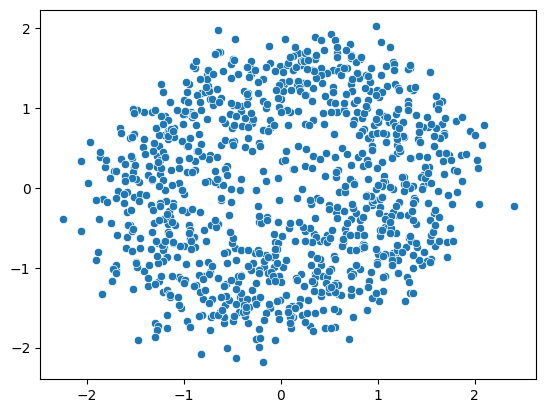

In [17]:
sns.scatterplot(x=Xs[:, 0], y=Xs[:, 1])

## $\color{olive}{\text{Task}}  1.3.4$

We have already familiarised ourselves with **DDIM**, where the main formula:

$$x_{t-1} = \sqrt{\overline{\alpha_{t-1}}}(\frac{x_{t} - \sqrt{1 - \overline{\alpha_{t}}}\epsilon_{\theta}(x_{t},t)}{\sqrt{\overline{\alpha_{t}}}}) + \sqrt{1 - \overline{\alpha_{t-1}} -\sigma^{2}_{t}}\epsilon_{\theta}(x_{t},t) + \sigma_{t}\epsilon_{t}$$

where

$$ \sigma_t = \color{olive}{\eta} \sqrt{\frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \frac{1 - \overline{\alpha}_{t}}{\overline{\alpha}_{t-1}}} $$


So, below you will have to implement forward and reverse DDIM. We only make noise-make our pictures noisy. It is important to note that we do not need to retrain the model to use DDIM. The task is evaluated by 2 points

In [18]:
class DiffusionWithDDIM(Diffusion):
    def __init__(self, *args, **kwargs):
        super(DiffusionWithDDIM, self).__init__(*args, **kwargs)

    @torch.no_grad()
    def ddim_step(
        self,
        model_out: torch.FloatTensor,
        x: torch.FloatTensor,
        t: torch.LongTensor,
        eta: float = 0.0
    ):
        """
        Performs ddim step. Use equation (8).
        """

        eps = model_out

        alpha_bar = _extract_into_tensor(self.alphas_cumprod, t, x.shape) ### your code is here ###
        alpha_bar_prev = _extract_into_tensor(self.alphas_cumprod_prev, t, x.shape) ### your code is here ###
        sigma = eta * torch.sqrt(
            (1. - alpha_bar_prev) / (1. - alpha_bar) * 
            (1. - alpha_bar / alpha_bar_prev)
        ) ### your code is here ###

        noise = torch.randn_like(x)
        x_t_norm = (x - torch.sqrt(1 - alpha_bar) * eps) / torch.sqrt(alpha_bar)
        xt = torch.sqrt(1 - alpha_bar_prev - sigma**2) * eps
        
        mean_pred = torch.sqrt(alpha_bar_prev) * x_t_norm + xt ### your code is here ###
        nonzero_mask = (t != 0).float().view(-1, *([1] * (len(x.shape) - 1))) ### your code is here ###, no noise when t == 0
        sample = mean_pred + nonzero_mask * sigma * noise

        return sample

    @torch.no_grad()
    def ddim_sample(
        self,
        model: nn.Module,
        shape: Tuple,
        y_dist: torch.FloatTensor,
        y: torch.LongTensor = None,
        noise: torch.FloatTensor = None,
    ):
        """
        Performs ddim sampling.
        """
        if noise is None:
            x = torch.randn(shape)
        else:
            x = noise

        b = x.shape[0]

               
        device = x.device
        for t in reversed(range(self.num_timesteps)):
            print(f'Sample timestep {t:4d}', end='\r')
            t_array = (torch.ones(b, device=device) * t).long()
            model_out = model(x.float(), t_array.float())
            x = self.ddim_step(
                model_out,
                x,
                t_array
            )

        return x

    @torch.no_grad()
    def ddim_reverse_step(
        self,
        model_out,
        x,
        t,
        eta=0.0 # dummy
    ):
        """
        Performs DDIM reverse step, i.e. xt from x_{t-1}. Use equation (8) to derive.
        """
        assert eta == 0.0, "Eta must be zero."

        eps = model_out

        alpha_bar_next = _extract_into_tensor(self.alphas_cumprod_next, t, x.shape) ### your code is here ###
        
        alpha_bar_prev = _extract_into_tensor(self.alphas_cumprod, t, x.shape)
        pred_x0 = (x - torch.sqrt(1 - alpha_bar_prev) * eps) / torch.sqrt(alpha_bar_prev)
        mean_pred = torch.sqrt(alpha_bar_next) * pred_x0 + torch.sqrt(1 - alpha_bar_next) * eps ### your code is here ###

        return mean_pred


    @torch.no_grad()
    def ddim_reverse_sample(
        self,
        model: nn.Module,
        x: torch.FloatTensor
    ):
        device = x.device
        # print(self.num_timesteps)
        ### your code is here ###
        for t in tqdm(reversed(range(self.num_timesteps)), total=self.num_timesteps):
            print(f'Sample reverse timestep {t:4d}', end='\r')
            t_array = (torch.ones(x.shape[0], device=device) * t).long()
            model_out = model(x.float(), t_array.float())
            x = self.ddim_reverse_step(model_out, x, t_array)
        return x

In [19]:
scheduler_name = 'linear' # 'quad', 'sigmoid'
diffusion_ddim = DiffusionWithDDIM(
    betas=get_named_beta_schedule(scheduler_name, 1000),
    loss_type="mse"
)

In [20]:
device = 'cpu'

In [21]:
Xs.shape

torch.Size([1000, 2])

In [22]:
eps_reveresed = diffusion_ddim.ddim_reverse_sample(model, Xs.to(device))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
eps_reveresed

tensor([[ -2.4940,  -2.3138],
        [ -2.5091,  -1.4147],
        [-11.1007,  -6.6210],
        ...,
        [ -3.3717,  -1.8276],
        [ -0.4602,   0.8913],
        [ -3.5897,  -0.8138]])

In [24]:
Xs_new = diffusion_ddim.ddim_sample(
    model,
    shape = (2),
    y_dist=1,
    noise = eps_reveresed.to('cpu')
)

<Axes: >

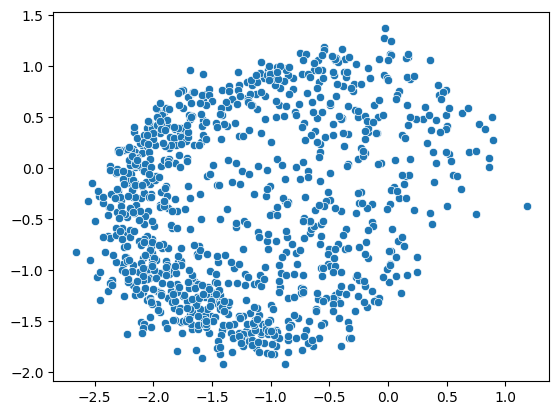

In [25]:
sns.scatterplot(x=Xs_new[:, 0], y=Xs_new[:, 1])

In [26]:
# conclusion: is there difference netween DDIM and DDPM samples?

$\textbf{Answer}$

First of all, graphs almost the same, also it should be said that despite differecne technique of sampling DDIM and DDPM generate almost simmilar objects, still DDIM a bit more structered than DDPM because of randomnes of noise on each step.

# Task 2. Moments of mean-reverting Ornstein-Uhlenbeck process (3 pts)

We consider the following diffusion forward mean-reverting Ornstein-Uhlenbeck process:

$$ dx = \theta(\mu -x)dt + \sigma dw(t), x(0) = x_{0}$$

where $\theta$ is responsible for reversion speed, $\mu$ is long-run equillibrium and $\sigma$ stands for the volatility

For this process, you should:

- Find solution $x(t)$ (1 point)
- Write ODE for the first moment and solve that (1 point)
- Write ODE for the second moment and solve that (1 point)

 $\color{red}{\text{Important}}$ : Your derivation should be understandable and clear with explicit transformations as for children, each transformation and each formula should be explained perfectly!

 Useful link:
 - https://users.aalto.fi/~asolin/sde-book/sde-book.pdf p.69 topic 5.5


I really advise to figure our SDE theory and understand derivation of moments for Ornstein-Uhlenbeck process from the seminar and apply knowledge for this process

$\textbf{Solution}$

$\textbf{1) First step: Find solution $x(t)$ (1 point)}$
\begin{cases}
dx = \theta(\mu -x)dt + \sigma dw(t)\\ x(0)= x_{0}
\end{cases}

Let's multiply both sides by integrating factor $e^{\theta t}$. It appears because we are considering stohastic process $y(t) = e^{\theta t} x(t)$.

$$e^{\theta t}dx = e^{\theta t}\theta(\mu -x)dt + e^{\theta t}\sigma dw(t)$$
$$e^{\theta t}dx + e^{\theta t}\theta x dt = e^{\theta t}\theta\mu dt + e^{\theta t}\sigma dw(t)$$
$$e^{\theta t}dx + x d(e^{\theta t}) = e^{\theta t}\theta\mu dt + e^{\theta t}\sigma dw(t)$$
Hence, 
$$d(e^{\theta t}x) = e^{\theta t}\theta\mu dt + e^{\theta t}\sigma dw(t)$$

Take the integral
$$\int_0^s d(e^{\theta s}x(s)) = \int_0^t e^{\theta s}\theta\mu ds + \int_0^t e^{\theta s}\sigma dw(s)$$
$$x\cdot e^{\theta s}|_0^t  = \int_0^t e^{\theta s}\theta \mu ds + \int_0^t e^{\theta s}\sigma dw(s)$$
$$x(t)\cdot e^{\theta t} - x(0) = e^{\theta t} \mu- \mu + \int_0^s e^{\theta s}\sigma dw(s)$$
In the result, 
$$x(t) = e^{ - \theta t}x(0) + \mu (1 - e^{-\theta t}) + \sigma e^{- \theta t}\int_0^s e^{\theta s} dw(s)$$

-------------------------------------------------------------------

$\textbf{2) Write ODE for the first moment and solve that (1 point)}$
\begin{cases}
\mathbb{E}[dx] = \mathbb{E}[\theta(\mu -x)dt + \sigma dw(t)]\\ \mathbb{E}[x(0)] = x_{0}
\end{cases}

So, we have:
$$\mathbb{E}[dx] = \mathbb{E}[\theta(\mu -x)dt + \sigma dw(t)]$$
$$\mathbb{E}[dx] = \theta(\mu - \mathbb{E}[x])dt + \sigma \cdot \mathbb{E}[dw(t)]$$
Now, let's use the fact that Wiener process has zero mean.
$$\mathbb{E}[dx] = \theta(\mu - \mathbb{E}[x])dt + 0$$
We also know that $\mathbb{E}[dx] = d\mathbb{E}[x]$, as we consider Ornstein-Uhlenbeck process (it's propert of the process).
$$d\mathbb{E}[x] = \theta(\mu - \mathbb{E}[x])dt$$
Let's note $m =\mathbb{E}[x]$. And consequently:
$$dm = \theta(\mu - m)dt$$
$$\frac{dm}{dt} = \theta(\mu - m)$$
And also,
$$m(0) = x_0$$
Now let's solve this:
$$e^{\theta t} \frac{dm}{dt} = e^{\theta t}\theta(\mu - m)$$
$$e^{\theta t} \frac{dm}{dt} + e^{\theta t}\theta m = e^{\theta t}\theta \mu$$
$$\frac{d}{dt}(e^{\theta t} m) = e^{\theta t}\theta \mu$$
$$d(e^{\theta t} m) = e^{\theta t}\theta \mu \cdot dt$$
Takong the integral we get:
$$e^{\theta t} m(t) - m(0) = e^{\theta t}\mu - \mu$$
$$m(t) = e^{-\theta t} m(0) + \mu(1 - e^{-\theta t} )$$

As $m(0) = x(0)$, we get:
$$\mathbb{E}[x(t)] = e^{-\theta t} x(0) + \mu(1 - e^{-\theta t} )$$

-------------------------------------------------------------------

$\textbf{3)Write ODE for the second moment and solve that (1 point)}$

We want to find $\mathbb{E}[dx^2]$

$$(dx)^2 = (\theta(\mu -x)dt + \sigma dw(t))^2$$
Here some key properties for the task (let's use without the proof):

- $(dt)^2 = 0$
- $(dw)^2 = dt$
- $dt \cdot dw = 0$

Then, 
$$(dx)^2 = \sigma^2 dt$$

Now, for the function $f(x) = x^2$ it's true that $df(x) = f'(x) dx+ \frac{1}{2} f''(x)(dx)^2$. And then:

$$(dx^2) = 2xdx + (dx)^2$$
$$(dx)^2 = (dx^2) - 2xdx = \sigma^2 dt$$
$$\sigma^2 dt = dx^2 - 2x (\theta(\mu -x)dt + \sigma dw(t))$$
$$dx^2 = \sigma^2 dt + 2x\theta \mu dt - 2x^2\theta dt + 2x \sigma dw(t)$$

Now, 

$$\mathbb{E}[dx^2] = \mathbb{E}[\sigma^2 dt + 2x\theta \mu dt - 2x^2\theta dt + 2x \sigma dw(t)]$$
It's known that $\mathbb{E}[xdw] = 0$.
$$\mathbb{E}[dx^2] = \sigma^2 dt + 2\mathbb{E}[x]\theta \mu dt - 2\mathbb{E}[x^2]\theta dt]$$

Let's note $\mathbb{E}[x^2] = M$:

$$\mathbb{E}[dx^2] = dt(\sigma^2 + 2m\theta \mu - 2M\theta)$$
$$d\mathbb{E}[x^2] = dt(\sigma^2 + 2m\theta \mu - 2M\theta)$$
$$\frac{dM}{dt} = \sigma^2 + 2m\theta \mu - 2M\theta$$
And then, $$M(0) = x_0^2$$

Let's solve it. From previuos part we can find $m(t)$ then:
$$\frac{dM}{dt} = \sigma^2 + 2(e^{-\theta t} m(0) + \mu(1 - e^{-\theta t} ))\theta \mu - 2M\theta$$
$$\frac{dM}{dt} = \sigma^2 + 2\theta \mu e^{-\theta t} m(0) + 2\theta \mu^2(1 - e^{-\theta t} ) - 2M\theta$$
Multiply by $e^{2\theta t}$, as we consider the second order:
$$e^{2\theta t}\frac{dM}{dt} = e^{2\theta t}\sigma^2 + 2e^{2\theta t}\theta \mu e^{-\theta t} m(0) + 2e^{2\theta t}\theta \mu^2(1 - e^{-\theta t} ) - 2M\theta e^{2\theta t}$$
$$\frac{d}{dt}(e^{2\theta t}M) = 2\theta\mu m(0) e^{\theta t} + 2\theta \mu^2  e^{2\theta t} - 2\theta\mu^2 e^{\theta t} + \sigma^2 e^{2\theta t}$$

Taking the integral we get:
$$e^{2\theta t}M(t) - M(0) = \int_0^t (2\theta\mu m(0) e^{\theta t} + 2\theta \mu^2  e^{2\theta t} - 2\theta\mu^2 e^{\theta t} + \sigma^2 e^{2\theta t}) dt$$
$$e^{2\theta t}M(t) - M(0) = 2\mu m(0) (e^{\theta t} - 1) + \mu^2  (e^{2\theta t} -1) - 2\mu^2 (e^{\theta t}-1) + \frac{1}{2 \theta}\sigma^2 (e^{2\theta t} - 1)$$
And finally, 
$$\mathbb{E}[x^2] = M(t) =  e^{-2\theta t}M(0) + 2e^{-2\theta t}\mu m(0) (e^{\theta t} - 1) + \mu^2 e^{-2\theta t} (e^{2\theta t} -1) - 2e^{-2\theta t}\mu^2 (e^{\theta t}-1) + \frac{1}{2 e^{-2\theta t}\theta}\sigma^2 (e^{2\theta t} - 1)$$


# Task 3 (Bonus). Flow matching (3 pts)



you can familiarise yourself before with papers:

- https://arxiv.org/abs/2210.02747
- https://arxiv.org/pdf/2302.00482v1


and github pages:

- https://github.com/atong01/conditional-flow-matching
- https://github.com/gle-bellier/flow-matching


# Flow Matching

Instead of adding and removing noise,
flow matching transforms probability distributions.
Let's consider
a time-dependent differentiable mapping $\phi:[0,1]\times \mathbb{R}^d \rightarrow \mathbb{R}^d$ that transforms samples $x_0 \in \mathbb{R}^d$ from an initial distribution $p(x_0)$ to
samples $x_t$ from a distribution $p(x_t)$.
In short: $x_t=\phi(x_0)$.

Later on, $x_0$ will represent samples from a simple distribution, such as a Gaussian distribution, similar to what we used for the diffusion models previously. On the other hand, $x_1$ corresponds to samples from the target distribution, i.e., samples from our training dataset ($y$ in the notation above). For the transformation of distributions, it's convenient to consider continuously changing distributions $p(x_t)$ for varying $t$. Just keep in mind that for $t=1$, we're at $x_1$ which is identical to $y$. I.e. $p(x_t)|_{t=1} = p(x_1) = p(y)$.

Flow matching learns the time derivative of this transformation, the _flow_, as a time-dependent vector field $u:[0,1]\times \mathbb{R}^d \rightarrow \mathbb{R}^d$, where
$u_t(x_t)=\frac{d}{dt}x_t$. For a neural network $f_{\theta}(x,t)$ the
loss function is simply an $L^2$ between predicted and target velocities:
$$
    \mathcal{L}_{\text{FM} }(\theta) = \mathbb{E}_{t \sim [0,1], ~ x_t \sim p(x_t)}\| f_{\theta}(x_t,t)-u_t(x_t) \|^2 ,
$$
where $p_t$ denotes the intermediate distributions at time $t$ with  $t \sim [0,1]$.

Looks surprisingly simple so far, and a lot like the loss for our noise estimation problem above. However, tithout additional tricks this loss function is intractable since we don't know the distributions $p(x_t)$ and the correct velocities $u_t$.

![title](https://github.com/atong01/conditional-flow-matching/blob/main/assets/169_generated_samples_otcfm.png?raw=true)

Luckily, it was shown in previous work that we can make use of
the known samples $x_1$ to drive the procedure without distorting the distributions.
We can construct a conditional vector field $u_t(x_t \vert x_1) $ based on  the $x_1$ samples.
Then the intermediate probability density and vector fields can be marginalized by integrating over $x_1$ as follows:
$
    p(x_t)=\int p(x_t|x_1)p(x_1)dx_1 ~ ,
$
and
$
u_t(x_t)
    = \int u_t(x_t\vert x_1) \frac{p(x_t\vert x_1)p(x_1)}{p(x_t)}dx_1  ~.
$
With this marginalization, it was demonstrated that learning this conditional flow is mathematically equivalent to learning the original flow.

We now have some freedom to prescribe flows, and it turns
out that straight, rectified motions are particularly interesting.
They can be derived from
optimal transport, which to define a **linear** mapping between samples from $p(x_0)$ and $p(x_1)$.
Starting with a normalized Gaussian distribution at $t=0$, we then want the standard deviations $\sigma_t$ to linearly decrease with $1-t$, so that we're left with no randomness at $t=1$. At the same time, the mean $\mu_t$ should change from zero to $x_1$, i.e. $\mu_t(x_1)=t ~ x_1$.

This gives the mapping:
$$
    \phi_t(x_0) = \sigma_t(x_t)x_0 + \mu_t(x_t),
$$
with it's time derivative being the velocity:
$$
    u_t(x_t \vert x_1)=\frac{d}{dt}\phi_t(x_0)=\sigma_t'(x_1)x_0 + \mu_t'(x_1)
    ~.
$$

In practice, we also introduce a threshold $\sigma_\text{min}$, to ensure that the standard deviation stays above zero.
In practice, $\sigma_\text{min}$ is chosen sufficiently small so that $p(x_1 \vert x_1)$ is representing a very concentrated Gaussian distribution centered at $x_1$. The time evolution of the standard deviation is then computed with
$\sigma_t(x_1)=1-(1-\sigma_\text{min})t$.



The great advantage of this setup is that it actually provides a "straight" motions with a constant vector field. The vector field is independent of time $t$! If things work out as planned, that means that we can compute the result of the transformation in a single Euler step, directly from $x_0$ to $x_1$. This is in stark contrast to the denoising above, where the network can learn arbitrary paths, and correspondingly requires a larger number of steps to arrive at the target. In practice, the _single-step_ inference requires a few more tricks, but we'll see below that flow matching works with much fewer steps than denoising, even with this simple, basic formulation.

Now we have all necessary ingredients to compute the target velocities $u_t$
as
$$
    u_t(x_t \vert x_1) = x_1 - (1-\sigma_\text{min}) x_0
    ~,
$$
 and we can formulate the conditional version of the loss function above:
$$
    \mathcal{L}_{\text{CFM}}(\theta) = \mathbb{E}_{t\sim [0,1], ~ x_1\sim p(x_1), ~ x_t \sim p(x_t\vert x_1)} \big\| f_{\theta}(x_t,t, x_1) - u_t(x_t\vert x_1) \big\|^2
$$

And once trained, we can query our network for the vector field to  generate  $x_1$ samples from $x_0$ via integration in time:
$x_1=x_0 + \int_0^1 f_{\theta}(x_t,t) dt$. To integrate this ODE, any ODE solver can be used. For simplicity, we'll use Euler steps below, but you can try a variety of higher-order methods in the DBFP code.


# Implementing Flow Matching

For the implementation, we'll again split the core functionality and the training code. The former is handled by the helper class `MyFlowMatcher`. It's even simpler than the previous one for denoising: `phi_t()` computes the linear forward step by interpolating two samples `x_0` and `x_1`. `u_t()` instead computes the time derivative, as explained above.

The last function `cfm_loss()` computes the target velocity and evaluates the conditional flow matching loss for a training step.


In [27]:
class MyFlowMatcher():

    def __init__(self):
        self._unifrom_sampler = torch.distributions.uniform.Uniform(0.,1.)
        self.sig_min = 0.001

    def phi_t(self, x_0, x_1, t):
        return (1-(1-self.sig_min)*t)*x_0 + t*x_1

    def u_t(self, x_0, x_1, t):
        return x_1-(1-self.sig_min)*x_0

    def cfm_loss(self, network, x_1, x_0=None, *args,**kwargs):
        x_0 = torch.randn_like(x_1) if x_0 is None else x_0
        t = self._unifrom_sampler.sample([x_1.shape[0]]+[1]*(x_1.dim()-1)).to(x_1.device)
        x_t = self.phi_t(x_0,x_1,t)
        v_t = self.u_t(x_0,x_1,t)
        return torch.mean( (network(x_t,t.view(t.shape[0]),*args,**kwargs) - v_t) **2)

The flow matching trainer relies on the `trainer` base class, and primarily has the job transfer targets and conditioning data to the PyTorch device, and call the `cfm_loss()` function. Not much left to do here...

In [28]:
class TrainerStepLr(Trainer):
    
    def __init__(self) -> None:
        super().__init__()

    def set_configs_type(self):
        super().set_configs_type()
        lr_scheduler_configs=self.configs_handler.get_config_features("lr_scheduler")
        lr_scheduler_configs["option"].append("step")
        self.configs_handler.set_config_features("lr_scheduler",lr_scheduler_configs)

    def get_lr_scheduler(self,optimizer):
        if self.configs.lr_scheduler=="step":
            if self.configs.warmup_epoch !=0:
                raise ValueError("Step Learning rate scheduler doesn't support warm up.")
            final_lr_ratio=self.configs.final_lr/self.configs.lr
            lr_change_frequency=0.01
            lr_gamma = math.pow(final_lr_ratio, 1/(1/lr_change_frequency-1))
            lr_step_size = int(lr_change_frequency*self.configs.epochs)
            return torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step_size, gamma=lr_gamma, last_epoch=-1)
        else:
            return super().get_lr_scheduler(optimizer)
            
    def train(self, network, train_loader, optimizer, steps):
        network.train()
        losses = []

        for step in range(steps):
            batched_data = next(iter(train_loader))
            loss = self.train_step(network, batched_data, step, len(train_loader), step, steps)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            if step % 500 == 0:
                print(f"Step {step}/{steps} | Loss: {loss.item():.4f}")

        return losses

    def event_before_training(self,network):
        self.flow_matcher = MyFlowMatcher()


In [29]:
class MyFMTrainer(TrainerStepLr):

    def __init__(self) -> None:
        super().__init__()

    def event_before_training(self,network):
        self.flow_matcher = MyFlowMatcher()

    def train_step(self, network: torch.nn.Module, batched_data, idx_batch: int, num_batches: int, idx_epoch: int, num_epoch: int):
        condition = batched_data[0].to(device=self.configs.device)
        targets = batched_data[1].to(device=self.configs.device)
        loss=self.flow_matcher.cfm_loss(network=network,x_1=targets,condition=condition)
        return loss


Next we can instantiate a trainer object, and allocate a network. We're using a U-net that's identical to the one previously used for denoising, so that we can make a fair comparison between the two training methodologies.

In [30]:
def integrate_euler( f, x_0, t_0, t_1, dt):
    t_0 = torch.as_tensor(t_0, dtype=x_0.dtype, device=x_0.device)
    t_1 = torch.as_tensor(t_1, dtype=x_0.dtype, device=x_0.device)
    dt  = torch.as_tensor(dt,  dtype=x_0.dtype, device=x_0.device)
    with torch.no_grad():
        t=t_0
        x=x_0
        while (t_1 - t) > 0:
            dt = torch.min(abs(dt), abs(t_1 - t))
            x, t = x + dt * f(t,x), t + dt
    return x

def fm_sample( network, x_0, dt, condition):
    with torch.no_grad():

        def wrapper(t,x):
            return network(x,
                        t*torch.ones((x.shape[0],)).to(x_0.device),
                        condition=condition)

        return integrate_euler( f=wrapper, x_0=x_0,  t_0=0.,  t_1=1., dt=dt)

def sample_flowmatching(network, input_field, dt, num_sample=100):
    network.eval();network.to(device);predictions=[]
    batch_size=25;N_all=num_sample

    while N_all>0:
        batch_size_now=min(batch_size,N_all)
        N_all-=batch_size
        condition=input_field.to(device).repeat(batch_size_now,1,1,1)
        noise=torch.randn_like(condition)
        prediction_batch=normalized2dimless(
            fm_sample(x_0=noise,
                      network=network, dt=dt,
                      condition=condition)
            )
        predictions.append(prediction_batch.detach().cpu().numpy())
    predictions=np.concatenate(predictions,axis=0)
    return np.mean(predictions,axis=0), np.std(predictions,axis=0), predictions

## $\color{olive}{\text{Task}} 3$ (3 points)

![fm](https://github.com/atong01/conditional-flow-matching/blob/main/assets/8gaussians-to-moons.gif?raw=true)

You should take moon dataset from  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html  and **Gaussian Mixture** of 8 components (please write the corresponidng class at Pytorch) and train FM model between these datsets with already defined methods and function above from 8. gaussians to moons

useful link:

- https://github.com/atong01/conditional-flow-matching/blob/main/examples/2D_tutorials/tutorial_training_8_gaussians_to_moons.ipynb


- https://github.com/gle-bellier/flow-matching/blob/main/Flow_Matching.ipynb

In [31]:
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons

class GaussianMixture8(Dataset):
    def __init__(self, n_samples=1000, radius=2.0, std=0.15, seed=0, device="cpu"):
        self.n_samples = int(n_samples)
        self.radius = float(radius)
        self.std = float(std)

        g = torch.Generator(device="cpu")
        g.manual_seed(seed)

        angles = torch.linspace(0, 2 * math.pi, steps=9)[:-1]
        centers = torch.stack([torch.cos(angles), torch.sin(angles)], dim=1) * self.radius

        comp = torch.randint(low=0, high=8, size=(self.n_samples,), generator=g)
        eps = torch.randn(self.n_samples, 2, generator=g) * self.std
        x = centers[comp] + eps

        self.x = x.to(device=device, dtype=torch.float32)

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.x[idx]

class MoonsDataset(Dataset):
    def __init__(self, n_samples=1000, noise=0.08, seed=0, scale=2.0, device="cpu"):
        X, _ = make_moons(n_samples=int(n_samples), noise=float(noise), random_state=int(seed))
        X = X.astype(np.float32)

        X = X - X.mean(axis=0, keepdims=True)
        X = X * float(scale)

        self.x = torch.from_numpy(X).to(device=device, dtype=torch.float32)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx]

class PairedIndependent(Dataset):
    def __init__(self, source_ds: Dataset, target_ds: Dataset, length=200000, seed=0):
        self.source = source_ds
        self.target = target_ds
        self.length = int(length)
        self.rng = np.random.default_rng(seed)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        i0 = self.rng.integers(0, len(self.source))
        i1 = self.rng.integers(0, len(self.target))
        return self.source[i0], self.target[i1]

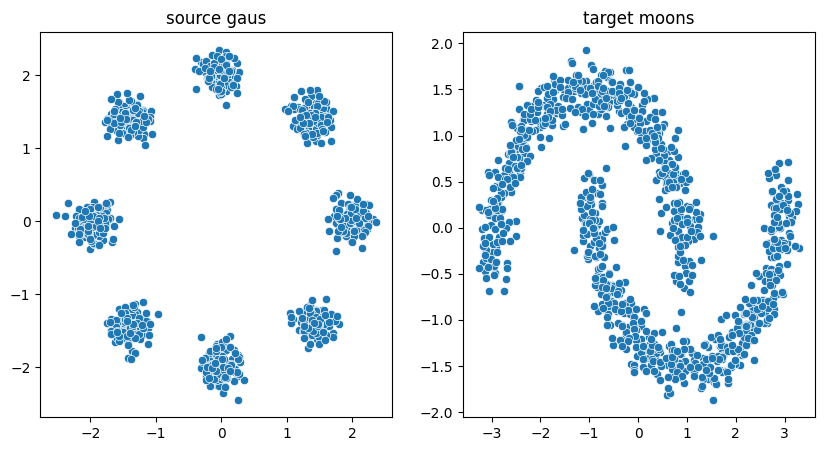

In [32]:
dset_source = GaussianMixture8()
dset_target = MoonsDataset()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title("source gaus"); sns.scatterplot(x=dset_source[:,0], y=dset_source[:,1])
plt.subplot(1, 2, 2); plt.title("target moons"); sns.scatterplot(x=dset_target[:,0], y=dset_target[:,1])
plt.show()

In [33]:
def validate(model, loader, flow_matcher, device):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_1 in loader:
            x_1 = x_1.to(device)
            x_0 = torch.randn_like(x_1)
            val_loss += flow_matcher.cfm_loss(model, x_1, x_0).item()
    return val_loss / len(loader)


Step 0/3000, loss: 4.4751, val loss: 2.9064
Step 500/3000, loss: 3.2365, val loss: 2.8476
Step 1000/3000, loss: 3.5851, val loss: 2.8075
Step 1500/3000, loss: 3.3672, val loss: 2.8611
Step 2000/3000, loss: 3.1683, val loss: 2.6216
Step 2500/3000, loss: 2.0771, val loss: 3.1340


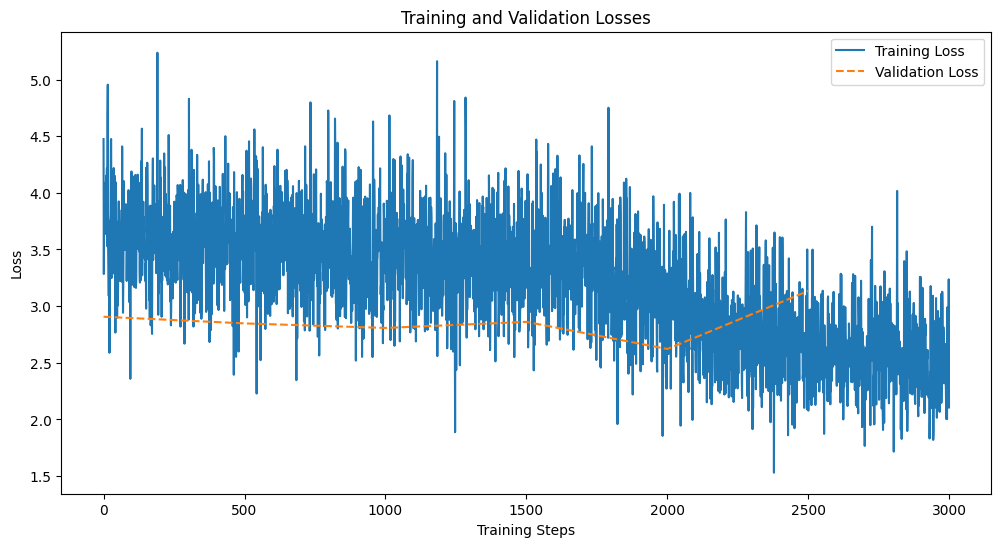

In [34]:
device = 'cpu'
fm_model = DiffModel(d_in=2).to(device)
flow_matcher = MyFlowMatcher()
optimizer = torch.optim.Adam(fm_model.parameters(), lr=1e-3)
bs = 64
loader_source = DataLoader(GaussianMixture8(2000), batch_size=bs, shuffle=True)
loader_target = DataLoader(MoonsDataset(2000), batch_size=bs, shuffle=True)
loader_target_val = DataLoader(MoonsDataset(1000), batch_size=bs, shuffle=False)

steps = 3000

iter_source = iter(loader_source)
iter_target = iter(loader_target)

train_losses = []
val_losses = []

for step in range(steps):
    try:
        x_0 = next(iter_source)
    except StopIteration:
        iter_source = iter(loader_source)
        x_0 = next(iter_source)

    try:
        x_1 = next(iter_target)
    except StopIteration:
        iter_target = iter(loader_target)
        x_1 = next(iter_target)

    min_len = min(len(x_0), len(x_1))
    x_0 = x_0[:min_len].to(device)
    x_1 = x_1[:min_len].to(device)
    
    optimizer.zero_grad()
    loss = flow_matcher.cfm_loss(fm_model, x_1, x_0)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if step % 500 == 0:
        val_loss = validate(fm_model, loader_target_val, flow_matcher, device)
        val_losses.append(val_loss)
        print(f"Step {step}/{steps}, loss: {loss.item():.4f}, val loss: {val_loss:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(range(0, steps, 500), val_losses, label="Validation Loss", linestyle="--")
plt.title("Training and Validation Losses")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [35]:
def plot_reconstruction(model, loader_source, loader_target, device, ode_steps=100):
    model.eval()
    
    x_0 = next(iter(loader_source))[:500].to(device).float()
    x_1 = next(iter(loader_target))[:500].to(device).float()
    
    x_t = x_0.clone()
    dt = 1.0 / ode_steps
    
    for step in range(ode_steps):
        t = torch.full((x_t.shape[0], 1), step / ode_steps, device=device)
        v = model(x_t, t)
        x_t = x_t + v * dt
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].scatter(x_0[:, 0].cpu().detach().numpy(), x_0[:, 1].cpu().detach().numpy(), s=20, alpha=0.6)
    axes[0].set_title("source (t=0)")
    
    axes[1].scatter(x_t[:, 0].cpu().detach().numpy(), x_t[:, 1].cpu().detach().numpy(), s=20, alpha=0.6, c='red')
    axes[1].set_title("generated (t=1)")
    
    axes[2].scatter(x_1[:, 0].cpu().detach().numpy(), x_1[:, 1].cpu().detach().numpy(), s=20, alpha=0.6, c='green')
    axes[2].set_title("target (t=1)")
    
    plt.tight_layout()
    plt.show()

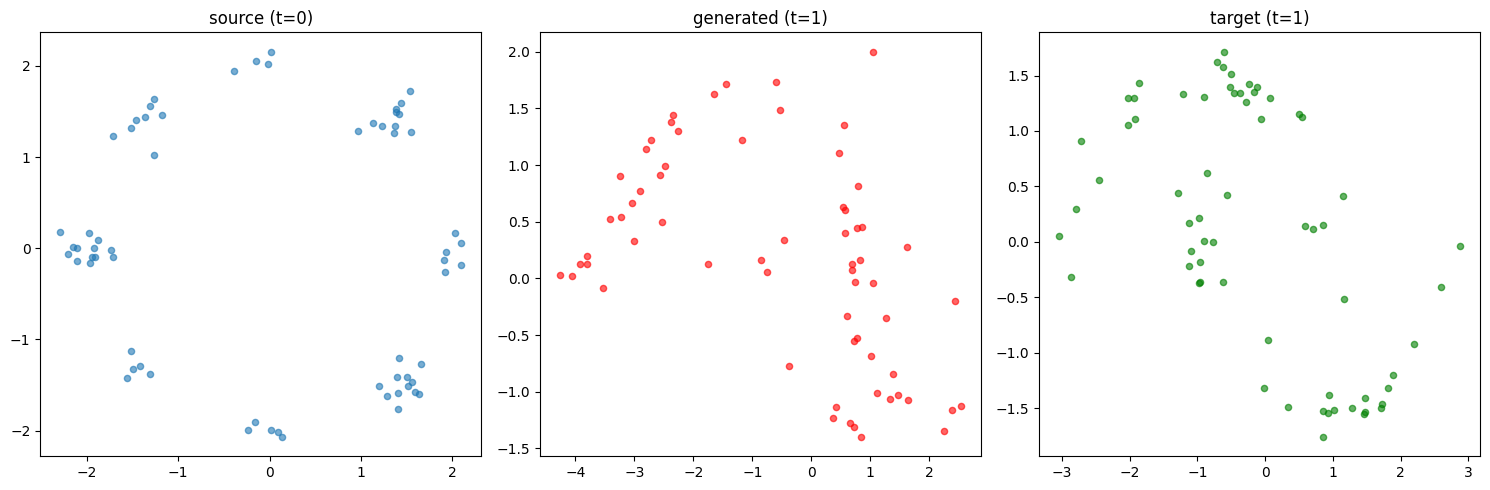

In [36]:
plot_reconstruction(fm_model, loader_source, loader_target, device)